In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import seaborn as sns

# Study data files
titles_path = './netflix_titles.csv'

titles_df = pd.read_csv(titles_path)
titles_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
# cleaning data

for i in titles_df.columns:
    null_rate = titles_df[i].isna().sum() / len(titles_df) * 100 
        
titles_df['country'] = titles_df['country'].fillna(titles_df['country'].mode()[0])
titles_df['cast'].replace(np.nan, 'No Data',inplace  = True)
titles_df['director'].replace(np.nan, 'No Data',inplace  = True)

titles_df.dropna(inplace=True)
titles_df.drop_duplicates(inplace= True)   

titles_df["date_added"] = pd.to_datetime(titles_df['date_added'])
titles_df['month_added']=titles_df['date_added'].dt.month
titles_df['month_name_added']=titles_df['date_added'].dt.month_name()
titles_df['year_added'] = titles_df['date_added'].dt.year

titles_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021


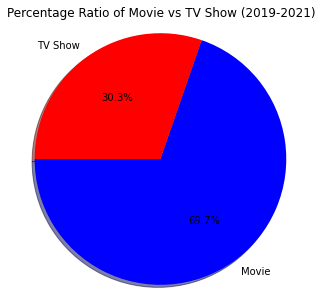

In [6]:
# Count title type, and plot the percentage ratio of movie vs tv show
title_type = titles_df["type"].value_counts()
plt.figure(figsize=(5,5))
plt.title('Percentage Ratio of Movie vs TV Show (2019-2021)')
pies = ["Movie", "TV Show"]
pie_type = [6126,2664]
colors = ["blue", "red"]

# create a pie chart based upon the above data
plt.pie(pie_type, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.savefig('../The-First-Project/%ratio_movie_tvshow.png')
plt.show()

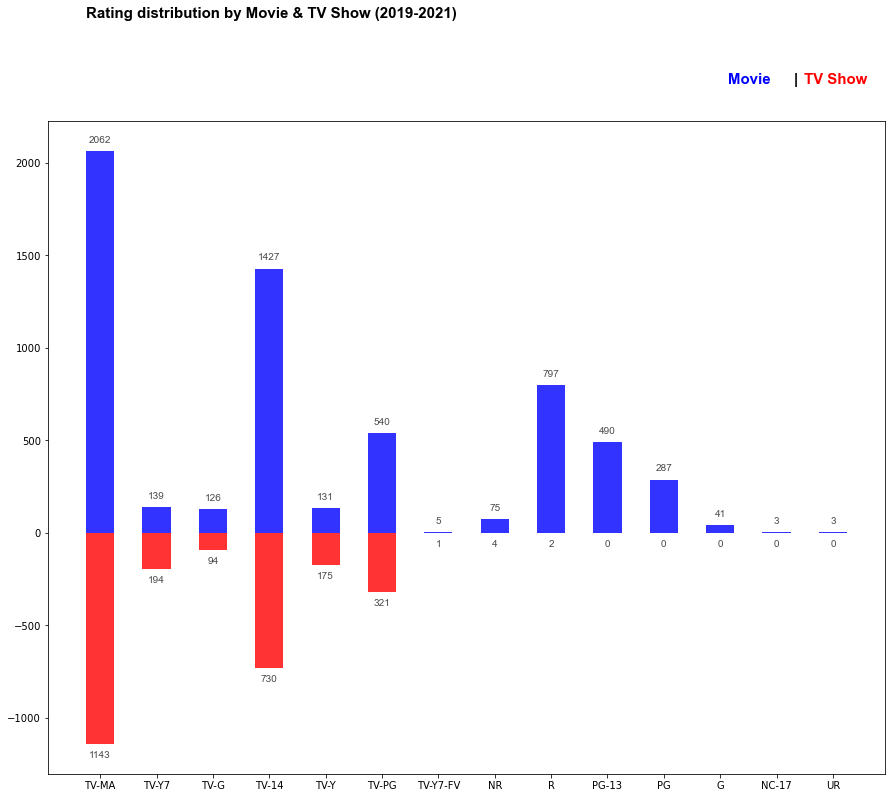

In [7]:
# distribution of ratings by type
order = pd.DataFrame(titles_df.groupby('rating')['type'].sum().sort_values(ascending=False).reset_index())
rating_order = list(order['rating'])

movie_tvshow = titles_df.groupby('type')['rating'].value_counts().unstack().sort_index().fillna(0).astype(int)[rating_order]
movie = movie_tvshow.loc['Movie']
tv = - movie_tvshow.loc['TV Show']

fig, ax = plt.subplots(1,1, figsize=(15, 12))
ax.bar(movie.index, movie, width=0.5, color='blue', alpha=0.8, label='Movie')
ax.bar(tv.index, tv, width=0.5, color='red', alpha=0.8, label='TV Show')

# annotations
for i in tv.index:
    ax.annotate(f"{-tv[i]}", 
                   xy=(i, tv[i] - 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='arial',
                   color='#4a4a4a')   

for i in movie.index:
    ax.annotate(f"{movie[i]}", 
                   xy=(i, movie[i] + 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='arial',
                   color='#4a4a4a')   

fig.text(0.16, 1, 'Rating distribution by Movie & TV Show (2019-2021)', fontsize=15, fontweight='bold', fontfamily='arial')
fig.text(0.755,0.924,"Movie", fontweight="bold", fontfamily='arial', fontsize=15, color='blue')
fig.text(0.815,0.924,"|", fontweight="bold", fontfamily='arial', fontsize=15, color='black')
fig.text(0.825,0.924,"TV Show", fontweight="bold", fontfamily='arial', fontsize=15, color='red')

plt.savefig('../The-First-Project/rating_dist_movie_tvshow.png')
plt.show()

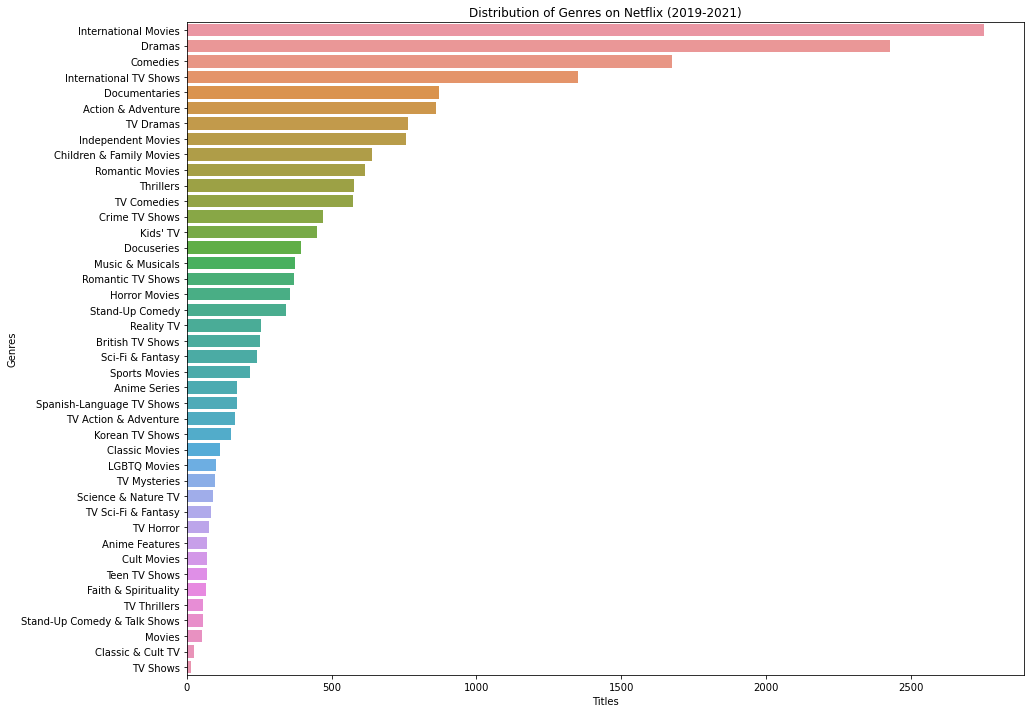

In [8]:
title_genres = titles_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(15,12))
genre = sns.countplot(y = title_genres, order=title_genres.value_counts().index[:])
plt.title('Distribution of Genres on Netflix (2019-2021)')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.savefig('../The-First-Project/distribution_genres.png')
plt.show()